In [51]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np
#%matplotlib notebook

In [2]:
mentaldisorder = pd.read_csv("Mental health Depression disorder Data.csv")
mentaldisorder

/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_91148/1815990514.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mentaldisorder = pd.read_csv("Mental health Depression disorder Data.csv")


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
108548,108548,Zimbabwe,ZWE,2013,303564.6036,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.7693,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.5072,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.3538,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
mentaldisorder = mentaldisorder.loc[mentaldisorder["Year"]=="2017"]
del mentaldisorder["index"]
mentaldisorder = mentaldisorder.dropna()
mentaldisorder = mentaldisorder.drop(6383) #delete the row "world"
mentaldisorder

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
27,Afghanistan,AFG,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
55,Albania,ALB,2017,0.201025,0.70448,0.174046,3.385245,0.517614,2.208414,1.837955
83,Algeria,DZA,2017,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
111,American Samoa,ASM,2017,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
167,Andorra,AND,2017,0.263512,0.963331,0.644559,5.305375,0.910066,3.729532,1.256050
...,...,...,...,...,...,...,...,...,...,...
6243,Venezuela,VEN,2017,0.205537,0.779803,0.28269,2.866789,0.645770,2.814584,1.370216
6271,Vietnam,VNM,2017,0.244663,0.552653,0.128466,2.066871,0.693534,2.879450,1.739466
6411,Yemen,YEM,2017,0.171691,0.735682,0.132623,4.857207,1.414725,4.012346,0.634413
6439,Zambia,ZMB,2017,0.165866,0.605972,0.142768,3.599714,0.515972,3.641811,1.633243


In [4]:
del mentaldisorder["Code"]
del mentaldisorder["Year"]
mentaldisorder

,Entity,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
27,Afghanistan,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
55,Albania,0.201025,0.70448,0.174046,3.385245,0.517614,2.208414,1.837955
83,Algeria,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
111,American Samoa,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
167,Andorra,0.263512,0.963331,0.644559,5.305375,0.910066,3.729532,1.256050
...,...,...,...,...,...,...,...,...
6243,Venezuela,0.205537,0.779803,0.28269,2.866789,0.645770,2.814584,1.370216
6271,Vietnam,0.244663,0.552653,0.128466,2.066871,0.693534,2.879450,1.739466
6411,Yemen,0.171691,0.735682,0.132623,4.857207,1.414725,4.012346,0.634413
6439,Zambia,0.165866,0.605972,0.142768,3.599714,0.515972,3.641811,1.633243


In [5]:
mentaldisorder = mentaldisorder.reset_index(drop=True)
mentaldisorder = mentaldisorder.rename(columns={"Entity": "country"})
mentaldisorder

,country,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
1,Albania,0.201025,0.70448,0.174046,3.385245,0.517614,2.208414,1.837955
2,Algeria,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
3,American Samoa,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
4,Andorra,0.263512,0.963331,0.644559,5.305375,0.910066,3.729532,1.256050
...,...,...,...,...,...,...,...,...
190,Venezuela,0.205537,0.779803,0.28269,2.866789,0.645770,2.814584,1.370216
191,Vietnam,0.244663,0.552653,0.128466,2.066871,0.693534,2.879450,1.739466
192,Yemen,0.171691,0.735682,0.132623,4.857207,1.414725,4.012346,0.634413
193,Zambia,0.165866,0.605972,0.142768,3.599714,0.515972,3.641811,1.633243


In [6]:
data0 = pd.read_csv("Income and suicide.csv")
data0

,country,Suicide rate,# Suicides Per 100k People,U.S. dollars
0,Mexico,0.000055,5.548487,328.05
1,Ecuador,0.000061,6.089173,472.23
2,Kazakhstan,0.000114,11.431212,515.80
3,Costa Rica,0.000069,6.851314,906.48
4,Lithuania,0.000218,21.754026,1494.70
5,Czechia,0.000114,11.441543,1659.91
6,Latvia,0.000157,15.680505,1671.16
7,Estonia,0.000158,15.795150,2193.45
8,Slovenia,0.000175,17.503647,2621.78
9,Spain,0.000092,9.223983,3000.21


In [7]:
data = pd.merge(data0, mentaldisorder, on="country", how="left")
data = data.dropna()
data = data.reset_index(drop=True)
data

,country,Suicide rate,# Suicides Per 100k People,U.S. dollars,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Mexico,0.000055,5.548487,328.05,0.211765,0.818921,0.316975,3.186326,0.820863,2.788807,1.729604
1,Ecuador,0.000061,6.089173,472.23,0.202912,0.882945,0.363733,4.305357,0.668946,2.977117,1.706748
2,Kazakhstan,0.000114,11.431212,515.80,0.199892,0.667338,0.227918,2.607806,0.605455,3.511775,3.369006
3,Costa Rica,0.000069,6.851314,906.48,0.21389,0.843753,0.289342,2.936829,0.778956,2.904788,1.472594
4,Lithuania,0.000218,21.754026,1494.70,0.200982,0.700278,0.234095,2.937224,0.631073,4.143254,4.428001
5,Latvia,0.000157,15.680505,1671.16,0.19951,0.696349,0.225275,2.944950,1.041688,3.499571,4.408781
6,Estonia,0.000158,15.795150,2193.45,0.203978,0.708241,0.250271,2.962244,1.126665,3.848854,4.713617
7,Slovenia,0.000175,17.503647,2621.78,0.211824,0.725343,0.239636,3.449773,0.906052,2.863278,2.246827
8,Spain,0.000092,9.223983,3000.21,0.281539,0.976917,0.730626,5.280279,1.468868,3.538359,0.885003
9,Singapore,0.000063,6.313967,3286.12,0.27409,0.730592,0.553712,3.730467,0.914669,3.438271,0.491369


In [28]:
data.dtypes

country                        object
Suicide rate                  float64
# Suicides Per 100k People    float64
U.S. dollars                  float64
Schizophrenia (%)              object
Bipolar disorder (%)           object
Eating disorders (%)           object
Anxiety disorders (%)         float64
Drug use disorders (%)        float64
Depression (%)                float64
Alcohol use disorders (%)     float64
dtype: object

In [30]:
data["Schizophrenia (%)"] = data["Schizophrenia (%)"].astype(float)
data["Bipolar disorder (%)"] = data["Bipolar disorder (%)"].astype(float)
data["Eating disorders (%)"] = data["Eating disorders (%)"].astype(float)
data.dtypes

country                        object
Suicide rate                  float64
# Suicides Per 100k People    float64
U.S. dollars                  float64
Schizophrenia (%)             float64
Bipolar disorder (%)          float64
Eating disorders (%)          float64
Anxiety disorders (%)         float64
Drug use disorders (%)        float64
Depression (%)                float64
Alcohol use disorders (%)     float64
dtype: object

In [32]:
subdata = data
subdata = subdata.drop(["Suicide rate", "# Suicides Per 100k People", "U.S. dollars"], axis=1)
subdata

,country,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Mexico,0.211765,0.818921,0.316975,3.186326,0.820863,2.788807,1.729604
1,Ecuador,0.202912,0.882945,0.363733,4.305357,0.668946,2.977117,1.706748
2,Kazakhstan,0.199892,0.667338,0.227918,2.607806,0.605455,3.511775,3.369006
3,Costa Rica,0.213890,0.843753,0.289342,2.936829,0.778956,2.904788,1.472594
4,Lithuania,0.200982,0.700278,0.234095,2.937224,0.631073,4.143254,4.428001
5,Latvia,0.199510,0.696349,0.225275,2.944950,1.041688,3.499571,4.408781
6,Estonia,0.203978,0.708241,0.250271,2.962244,1.126665,3.848854,4.713617
7,Slovenia,0.211824,0.725343,0.239636,3.449773,0.906052,2.863278,2.246827
8,Spain,0.281539,0.976917,0.730626,5.280279,1.468868,3.538359,0.885003
9,Singapore,0.274090,0.730592,0.553712,3.730467,0.914669,3.438271,0.491369


In [9]:
xaxis = []
for i in range (14):
    xaxis.append(i)
xaxis

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

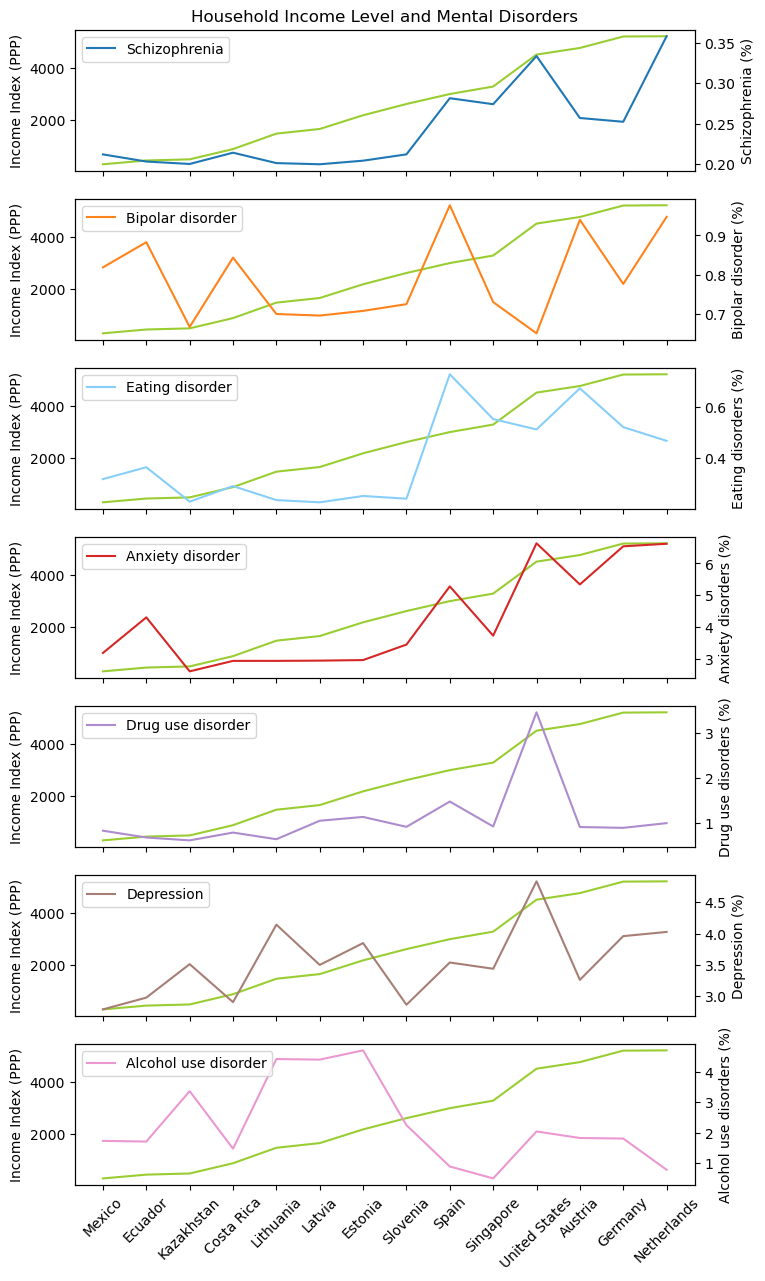

In [151]:
fig, (fig1, fig3, fig5, fig7, fig9, fig11, fig13) = plt.subplots(7, sharex=True, sharey=True, figsize=(8, 15))

fig1.plot(data["U.S. dollars"], color="yellowgreen")
fig1.set_xticks(xaxis)
fig1.set_xticklabels(subdata["country"], rotation = 45)
fig1.set_ylabel("Income Index (PPP)")
fig2 = fig1.twinx()
fig2.set_ylabel("Schizophrenia (%)")
fig2.plot(subdata["Schizophrenia (%)"])
plt.title("Household Income Level and Mental Disorders")
plt.legend(["Schizophrenia"], loc="best")

fig3.plot(data["U.S. dollars"], color="yellowgreen")
fig3.set_xticks(xaxis)
fig3.set_xticklabels(subdata["country"], rotation = 45)
fig3.set_ylabel("Income Index (PPP)")
fig4 = fig3.twinx()
fig4.set_ylabel("Bipolar disorder (%)")
fig4.plot(subdata["Bipolar disorder (%)"], color="#FF831B")
plt.legend(['Bipolar disorder'], loc="best")

fig5.plot(data["U.S. dollars"], color="yellowgreen")
fig5.set_xticks(xaxis)
fig5.set_xticklabels(subdata["country"], rotation = 45)
fig5.set_ylabel("Income Index (PPP)")
fig6 = fig5.twinx()
fig6.set_ylabel("Eating disorders (%)")
fig6.plot(subdata["Eating disorders (%)"], color="lightskyblue")
plt.legend(['Eating disorder'], loc="best")

fig7.plot(data["U.S. dollars"], color="yellowgreen")
fig7.set_xticks(xaxis)
fig7.set_xticklabels(subdata["country"], rotation = 45)
fig7.set_ylabel("Income Index (PPP)")
fig8 = fig7.twinx()
fig8.set_ylabel("Anxiety disorders (%)")
fig8.plot(subdata["Anxiety disorders (%)"], color="#D62727")
plt.legend(['Anxiety disorder'], loc="best")

fig9.plot(data["U.S. dollars"], color="yellowgreen")
fig9.set_xticks(xaxis)
fig9.set_xticklabels(subdata["country"], rotation = 45)
fig9.set_ylabel("Income Index (PPP)")
fig10 = fig9.twinx()
fig10.set_ylabel("Drug use disorders (%)")
fig10.plot(subdata["Drug use disorders (%)"], color="#AD8BCD")
plt.legend(['Drug use disorder'], loc="best")

fig11.plot(data["U.S. dollars"], color="yellowgreen")
fig11.set_xticks(xaxis)
fig11.set_xticklabels(subdata["country"], rotation = 45)
fig11.set_ylabel("Income Index (PPP)")
fig12 = fig11.twinx()
fig12.set_ylabel("Depression (%)")
fig12.plot(subdata["Depression (%)"], color="#A77E76")
plt.legend(['Depression'], loc="upper left")

fig13.plot(data["U.S. dollars"], color="yellowgreen")
fig13.set_xticks(xaxis)
fig13.set_xticklabels(subdata["country"], rotation = 45)
fig13.set_ylabel("Income Index (PPP)")
fig14 = fig13.twinx()
fig14.set_ylabel("Alcohol use disorders (%)")
fig14.plot(subdata["Alcohol use disorders (%)"], color="#EB98D0")
plt.legend(['Alcohol use disorder'], loc="upper left")

plt.savefig("Household Income Level and Mental Disorders.png")
plt.show()

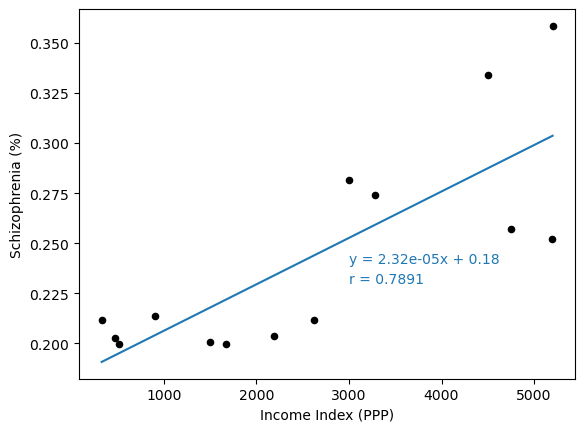

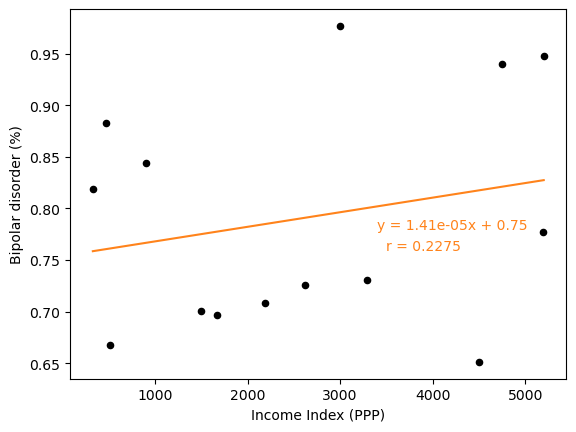

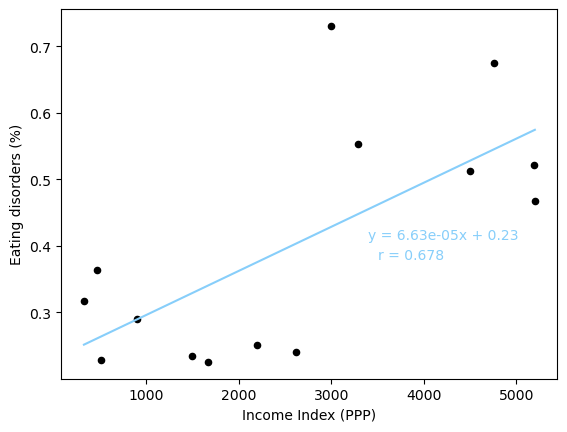

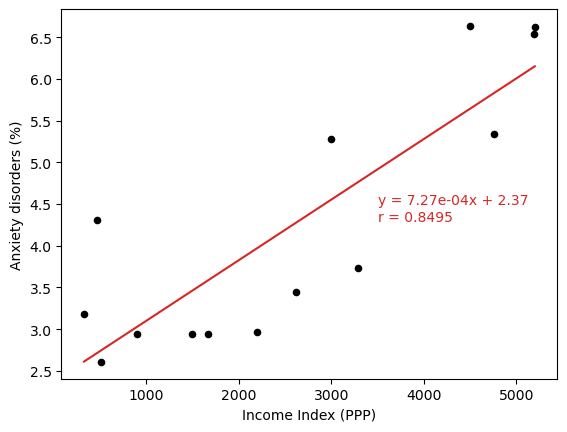

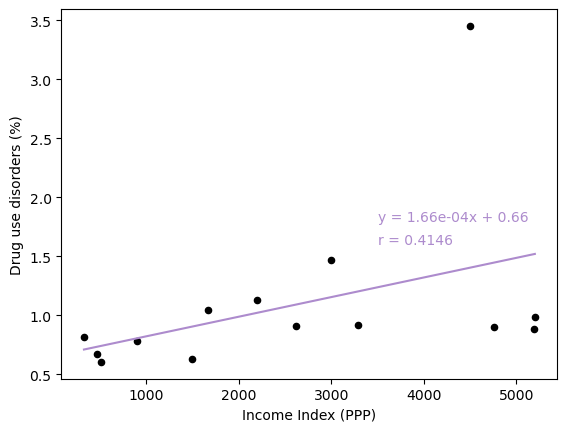

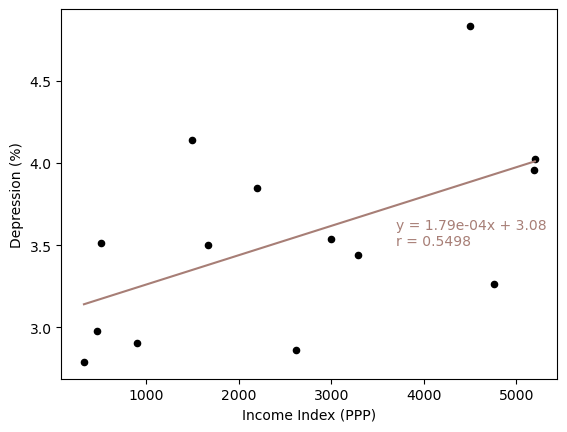

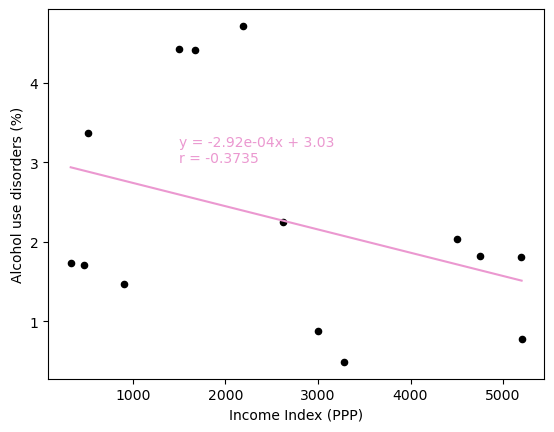

In [152]:
plot1 = data.plot(kind="scatter", x="U.S. dollars", y="Schizophrenia (%)", xlabel="Income Index (PPP)", ylabel="Schizophrenia (%)", color="black")
x = data["U.S. dollars"]
y1 = data["Schizophrenia (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#1f77b4")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3000, 0.24), color="#1f77b4")
plt.annotate(f"r = {round(rvalue,4)}", (3000, 0.23), color="#1f77b4")
plt.savefig("Income Schizo.png")
#plt.legend(['Schizophrenia'], loc="best")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot2 = data.plot(kind="scatter", x="U.S. dollars", y="Bipolar disorder (%)", xlabel="Income Index (PPP)", ylabel="Bipolar disorder (%)", color="black")
x = data["U.S. dollars"]
y1 = data["Bipolar disorder (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#FF831B")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3400, 0.78), color="#FF831B")
plt.annotate(f"r = {round(rvalue,4)}", (3500, 0.76), color="#FF831B")
plt.savefig("Income Bipolar.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot3 = data.plot(kind="scatter", x="U.S. dollars", y="Eating disorders (%)", xlabel="Income Index (PPP)", ylabel="Eating disorders (%)", color="black")
x = data["U.S. dollars"]
y1 = data["Eating disorders (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="lightskyblue")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3400, 0.41), color="lightskyblue")
plt.annotate(f"r = {round(rvalue,4)}", (3500, 0.38), color="lightskyblue")
plt.savefig("Income ED.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot4 = data.plot(kind="scatter", x="U.S. dollars", y="Anxiety disorders (%)", xlabel="Income Index (PPP)", ylabel="Anxiety disorders (%)", color="black")
x = data["U.S. dollars"]
y1 = data["Anxiety disorders (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#D62727")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3500, 4.5), color="#D62727")
plt.annotate(f"r = {round(rvalue,4)}", (3500, 4.3), color="#D62727")
plt.savefig("Income Anxiety.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot5 = data.plot(kind="scatter", x="U.S. dollars", y="Drug use disorders (%)", xlabel="Income Index (PPP)", ylabel="Drug use disorders (%)", color="black")
x = data["U.S. dollars"]
y1 = data["Drug use disorders (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#AD8BCD")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3500,1.8), color="#AD8BCD")
plt.annotate(f"r = {round(rvalue,4)}", (3500,1.6), color="#AD8BCD")
plt.savefig("Income Drug.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot6 = data.plot(kind="scatter", x="U.S. dollars", y="Depression (%)", xlabel="Income Index (PPP)", ylabel="Depression (%)", color="black")
x = data["U.S. dollars"]
y1 = data["Depression (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#A77E76")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (3700,3.6), color="#A77E76")
plt.annotate(f"r = {round(rvalue,4)}", (3700,3.5), color="#A77E76")
plt.savefig("Income Depression.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plot7 = data.plot(kind="scatter", x="U.S. dollars", y="Alcohol use disorders (%)", xlabel="Income Index (PPP)", ylabel="Alcohol use disorders (%)", color="black")
x = data["U.S. dollars"]
y1 = data["Alcohol use disorders (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y1)
reg = x * slope + intercept
plt.plot(x, reg, color="#EB98D0")
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (1500,3.2), color="#EB98D0")
plt.annotate(f"r = {round(rvalue,4)}", (1500,3), color="#EB98D0")
plt.savefig("Income Alcohol.png")
#plt.title("Correlation Analysis of Household Income and Suicide Rate")

plt.show()